## Time Series Analysis

#### Import the packages

In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from time import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Importing the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def open_files(files):
    list_df=[]
    for filename in files:

        data_file = os.path.join(root, filename)


        dfs = pd.read_csv(data_file, sep=',', header=None, encoding='utf-8', 
                          names=final_columns)
        dfs['date'] = dfs.date
        dfs['id'] = filename

        list_df.append(dfs)


    dfs = pd.concat(list_df)
    dfs = dfs.drop(dfs[dfs.date=='date'].index).reset_index(drop=True)
    del dfs['comments']
    return dfs

In [ ]:
root = '/content/drive/My Drive/Colab Notebooks/glucose/D1NAMO_glucose'

files = [f for f in os.listdir(root) if f.endswith(".csv")]

final_columns=['date', 'time', 'glucose', 'id','comments']

In [ ]:
dfs = open_files(files)

In [ ]:
dfs.head()

,date,time,glucose,id
0,2014-10-01,09:00:00,5.4,glucose_07.csv
1,2014-10-01,11:49:59,3.8,glucose_07.csv
2,2014-10-01,11:54:59,4,glucose_07.csv
3,2014-10-01,11:59:59,4.2,glucose_07.csv
4,2014-10-01,12:00:00,5.4,glucose_07.csv


#### Data Processing and Cleaning

In [ ]:
dfs['glucose'] = dfs['glucose'].astype(float)*18.018
dfs.head()

,date,time,glucose,id
0,2014-10-01,09:00:00,97.2972,glucose_07.csv
1,2014-10-01,11:49:59,68.4684,glucose_07.csv
2,2014-10-01,11:54:59,72.0720,glucose_07.csv
3,2014-10-01,11:59:59,75.6756,glucose_07.csv
4,2014-10-01,12:00:00,97.2972,glucose_07.csv


In [ ]:
datetime = dfs.date + ' ' + dfs.time

dfs['datetime'] = pd.to_datetime(datetime, format= '%Y/%m/%d %H:%M:%S', yearfirst=True)
dfs.head()

,date,time,glucose,id,datetime
0,2014-10-01,09:00:00,97.2972,glucose_07.csv,2014-10-01 09:00:00
1,2014-10-01,11:49:59,68.4684,glucose_07.csv,2014-10-01 11:49:59
2,2014-10-01,11:54:59,72.0720,glucose_07.csv,2014-10-01 11:54:59
3,2014-10-01,11:59:59,75.6756,glucose_07.csv,2014-10-01 11:59:59
4,2014-10-01,12:00:00,97.2972,glucose_07.csv,2014-10-01 12:00:00


In [ ]:
dfs.to_csv (r'/content/drive/My Drive/Colab Notebooks/glucose/D1NAMO_glucose\dfs.csv', index = False, header=True)

**Introduction to time series**

In [ ]:
raw_csv = pd.read_csv('/content/drive/My Drive/Colab Notebooks/glucose/D1NAMO_glucose\dfs.csv')

In [ ]:
raw_csv.head()

,date,time,glucose,id,datetime
0,2014-10-01,09:00:00,97.2972,glucose_07.csv,2014-10-01 09:00:00
1,2014-10-01,11:49:59,68.4684,glucose_07.csv,2014-10-01 11:49:59
2,2014-10-01,11:54:59,72.0720,glucose_07.csv,2014-10-01 11:54:59
3,2014-10-01,11:59:59,75.6756,glucose_07.csv,2014-10-01 11:59:59
4,2014-10-01,12:00:00,97.2972,glucose_07.csv,2014-10-01 12:00:00


In [ ]:
df_comp = raw_csv.copy()

#### Examining the data

In [ ]:
df_comp.head()

,date,time,glucose,id,datetime
0,2014-10-01,09:00:00,97.2972,glucose_07.csv,2014-10-01 09:00:00
1,2014-10-01,11:49:59,68.4684,glucose_07.csv,2014-10-01 11:49:59
2,2014-10-01,11:54:59,72.0720,glucose_07.csv,2014-10-01 11:54:59
3,2014-10-01,11:59:59,75.6756,glucose_07.csv,2014-10-01 11:59:59
4,2014-10-01,12:00:00,97.2972,glucose_07.csv,2014-10-01 12:00:00


In [ ]:
df_comp.isna().sum()

date        0
time        0
glucose     0
id          0
datetime    0
dtype: int64

#### Plotting the data

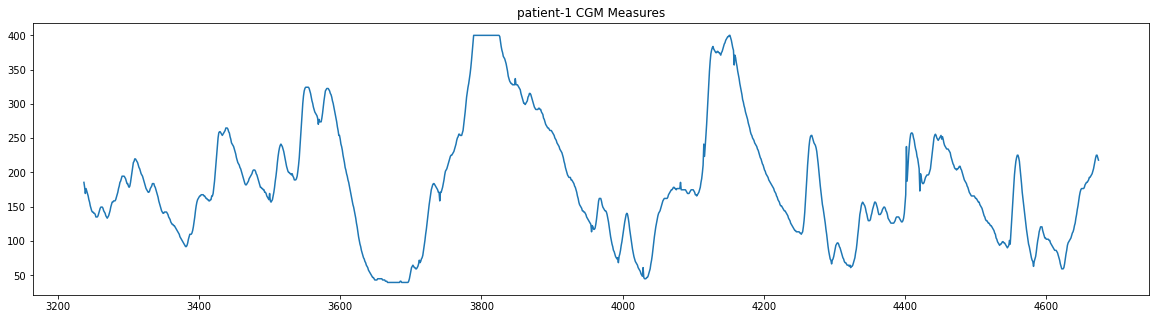

In [ ]:
p1 = df_comp[df_comp['id'] == 'glucose_01.csv']
p1.glucose.plot(figsize=(20,5), title = 'patient-1 CGM Measures')
plt.show();

#### The QQ Plot

In [ ]:
import scipy.stats

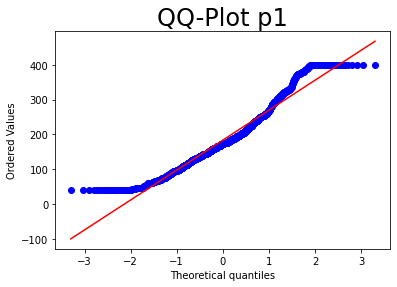

In [ ]:
scipy.stats.probplot(p1.glucose, plot=plt)
plt.title("QQ-Plot p1", size = 24)
plt.show();

La gráfica QQ toma todos los datos que una variable puede tomar, los ordena. Entonces el eje y va a expresar los valores de la medida de la glucosa. Donde tendremos a abajo el menor valor y arriba el mayor valor.

En el eje x tenemos los cuantiles teóricos del conjunto del dato. Los cuartiles miden a cuantas desviaciones estándar de la media están los valores. Cuan alejados de la media se encuentran los valores. La línea roja representa como deberían comportarse los valores si se distribuyese como una normal.

Observamos que los valores no siguen una normal. Tenemos valores que se encuentran al rededor del valor 50 y luego empiezan a subir al rededor de la línea y vuelve a haber una acumulación de puntos en 400. Por lo que no siguen una distribución normal.

#### White Noise

Un tipo especial de serie temporal donde los datos no siguen ningún patrón.

Condiciones:
* Media constante
* Varianza constante
* No tener autocorrelaciones

In [ ]:
#Generación de ruido blanco
wn = np.random.normal(loc = p1.glucose.mean(), scale = p1.glucose.std(), size = len(p1))

In [ ]:
wn_df = p1.copy()
wn_df['wn'] = wn
wn_df.head()

,date,time,glucose,id,datetime,wn
3237,2014-10-01,19:14:00,185.5854,glucose_01.csv,2014-10-01 19:14:00,-101.939095
3238,2014-10-01,19:19:00,178.3782,glucose_01.csv,2014-10-01 19:19:00,274.201678
3239,2014-10-01,19:23:00,169.3692,glucose_01.csv,2014-10-01 19:23:00,285.573206
3240,2014-10-01,19:24:00,176.5764,glucose_01.csv,2014-10-01 19:24:00,221.544584
3241,2014-10-01,19:29:00,172.9728,glucose_01.csv,2014-10-01 19:29:00,127.597508


In [ ]:
wn_df_g = wn_df.groupby(['date', 'time']).mean()
wn_df_g.head()

glucose          wn
date       time                          
2014-10-01 19:14:00  185.5854 -101.939095
           19:19:00  178.3782  274.201678
           19:23:00  169.3692  285.573206
           19:24:00  176.5764  221.544584
           19:29:00  172.9728  127.597508

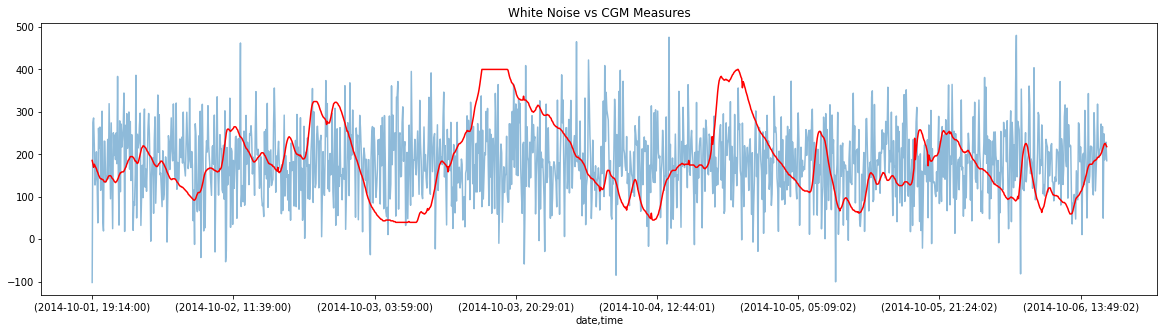

In [ ]:
wn_df_g.wn.plot(figsize=(20,5), alpha=0.5)
wn_df_g.glucose.plot(figsize=(20,5), c='r')
plt.title('White Noise vs CGM Measures')
plt.show();

In [ ]:
wn_df_g.describe()

,glucose,wn
count,1438.000000,1438.000000
mean,183.677096,181.304213
std,87.732461,85.743898
min,39.639600,-101.939095
25%,124.324200,125.414670
50%,172.972800,182.163368
75%,234.234000,236.224945
max,399.999600,480.268157


#### Serie Estacionaria

Una serie estable a lo largo del tiempo, es decir, cuando la media y la varianza son constantes en el tiempo, y además, no presentan tendencia. 

Condiciones:
* Media constante
* Varianza constante
* Autocorrelación entre datos consecutivos

#### Serie no estacionaria

una serie en la que su tendencia y/o variabilidad cambian en el tiempo. Los cambios en la media determinan una tendencia a crecer o decrecer a largo plazo, por lo que no oscilaría alrededor de un valor constante.

**Prueba de Dickey-Fuller o Prueba F**

Método para saber si un conjunto de datos proviene de un proceso estacionario o no estacionario.

Hipótesis: 

$H_0$: la serie no es estacionaria **$[\varphi_1 = 1]$**

$H_1$: La serie es estacionaria **$[\varphi_0 < 1]$**

Contraste de hipótesis: Si hay evidencia en contra de la hipótesis nula ($H_0$) entonces se rechaza la hipótesis nula y se acepta la hipótesis alternatica ($H_1$). 

* Podemos utilizar $\lambda_0$:estadístico de contraste, donde si **$\lambda_0 < \lambda_{crit}$**: Rechazamos la hipótesis nula, por lo que la serie es estacionaria.

* si utilizamos el **$p-valor$** (probalidad) necesitaremos también el nivel de significación (**$\alpha$**). Donde si **$p-valor < \alpha$**: Rechazamos la hipótesis nula, por lo que la serie es estacionaria.


In [ ]:
sts.adfuller(p1.glucose)
#No estacionaria

(-3.2296394552472742,
 0.018331869814565693,
 21,
 1416,
 {'1%': -3.434976549531161,
  '10%': -2.5678578416363433,
  '5%': -2.86358329808087},
 7969.345724631492)

In [ ]:
sts.adfuller(wn_df.wn)
#Estacionaria

(-38.31808437020931,
 0.0,
 0,
 1437,
 {'1%': -3.434908816804013,
  '10%': -2.5678419239852994,
  '5%': -2.863553406963303},
 16584.233666165324)

primer valor ($\lambda_0$): Valor del estadístico 
valor crítico ($\alpha$): {1%...}

Más fácil es observar el p-valor (segunda línea) -> comparamos con $\alpha$:
0.018 > -3.43: No rechazamos la hipotesis nula, la serie no es estacionaria.

Autocorrelacion que se remonta 21 veces a trás.

#### Estacionalidad

Aparición de ciertas tendencias de forma cíclica. La forma de saber si la serie tiene estacionalidad es descomponer la serie en tres efectos:
* Tendencia -> PATRÓN
* Estacional -> CICLOS
* Residual -> ERROR

Estacionalidad Aditiva:

$$X_t = \mu_t + S_t + \epsilon_t$$

Estacionalidad Multiplicativa:

$$X_t = \mu_t x S_t x \epsilon_t$$

In [ ]:
p1.index = p1['datetime']
p1.head()

,date,time,glucose,id,datetime
datetime,,,,,
2014-10-01 19:14:00,2014-10-01,19:14:00,185.5854,glucose_01.csv,2014-10-01 19:14:00
2014-10-01 19:19:00,2014-10-01,19:19:00,178.3782,glucose_01.csv,2014-10-01 19:19:00
2014-10-01 19:23:00,2014-10-01,19:23:00,169.3692,glucose_01.csv,2014-10-01 19:23:00
2014-10-01 19:24:00,2014-10-01,19:24:00,176.5764,glucose_01.csv,2014-10-01 19:24:00
2014-10-01 19:29:00,2014-10-01,19:29:00,172.9728,glucose_01.csv,2014-10-01 19:29:00


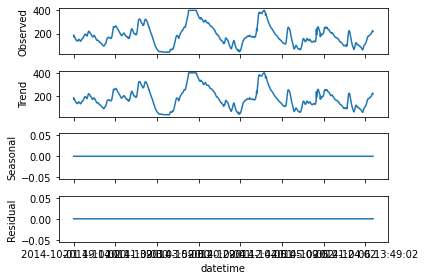

In [ ]:
additive = seasonal_decompose(p1['glucose'], model = 'additive', freq=1)
additive.plot()
plt.show()

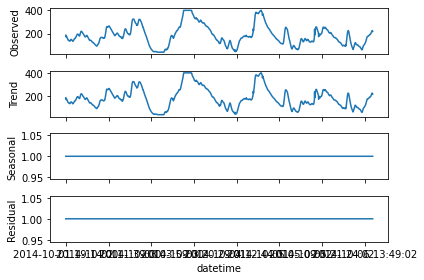

In [ ]:
multiplicative = seasonal_decompose(p1['glucose'], model = 'multiplicative', freq=1)
multiplicative.plot()
plt.show()

Podemos ver que se tomó toda la serie como componente tendencial y que no hubo estacionalidad.

También podemos ver que el gráfico de residuos muestra cero. Este es un buen ejemplo en el que la descomposición ingenua o clásica no pudo separar el ruido que agregamos de la tendencia lineal.

#### Correlacción

La similitud con respecto a cómo dos series cambian sus valores

$$corr(x,y)$$

#### Autocorrelación

Correlación entre una secuencia y sí misma

$$corr(x_t, x_{t-k})$$

donde:
* $x_{t-k}$: valores con 1 periodo de retraso

#### Función de autocorrelación (ACF)

Proporciona la correlación para cualquier retraso que consideremos. Donde se calculan formas directas e indirectas del valor de la serie. Es decir, todos los datos anteriores afectan a la predicción del valor del momento que queremos calcular.

#### Función de autocorrelación parcial (PACF)

Proporciona solo la correlación directa de los retrasos.



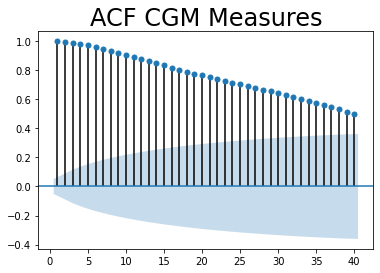

In [ ]:
#ACF
#lags = retrasos
#zero=False porque la autocorrelación entre un valor y si mismo siempre va a ser 1
sgt.plot_acf(p1.glucose, lags=40, zero=False)
plt.title('ACF CGM Measures', size=24)
plt.show();

Observamos que la autocorrelación entre los valores disminuye decrecientemente a medida que aumentan los retrasos.

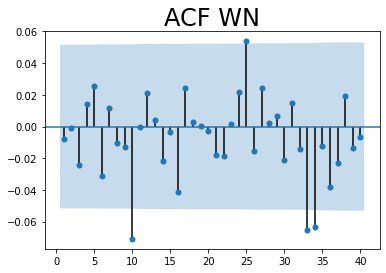

In [ ]:
sgt.plot_acf(wn_df.wn, lags=40, zero=False)
plt.title('ACF WN', size=24)
plt.show();

Los retrasos no son significativos, es decir, no hay correlación en el ruido blanco, ya que es una característica del ruido blanco.

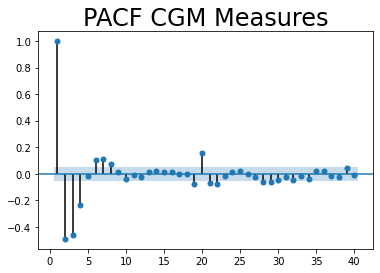

In [ ]:
#PACF
#lags = retrasos
#zero=False porque la autocorrelación entre un valor y si mismo siempre va a ser 1
#method = ols -> minimos cuadrados ordinarios
sgt.plot_pacf(p1.glucose, lags=40, zero=False, method=('ols'))
plt.title('PACF CGM Measures', size=24)
plt.show();

En azul tenemos el área sobreada (área de significación). solo los primeros elementos son más significativos. 

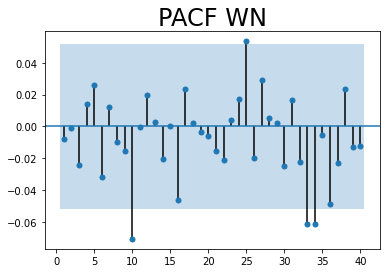

In [ ]:
sgt.plot_pacf(wn_df.wn, lags=40, zero=False, method=('ols'))
plt.title('PACF WN', size=24)
plt.show();

Todos los coeficientes son significativamente igual que cero. No existe autocorrelación en el ruido blanco.

#### Visualizando patrones

In [ ]:
p1.head()

,date,time,glucose,id,datetime
datetime,,,,,
2014-10-01 19:14:00,2014-10-01,19:14:00,185.5854,glucose_01.csv,2014-10-01 19:14:00
2014-10-01 19:19:00,2014-10-01,19:19:00,178.3782,glucose_01.csv,2014-10-01 19:19:00
2014-10-01 19:23:00,2014-10-01,19:23:00,169.3692,glucose_01.csv,2014-10-01 19:23:00
2014-10-01 19:24:00,2014-10-01,19:24:00,176.5764,glucose_01.csv,2014-10-01 19:24:00
2014-10-01 19:29:00,2014-10-01,19:29:00,172.9728,glucose_01.csv,2014-10-01 19:29:00


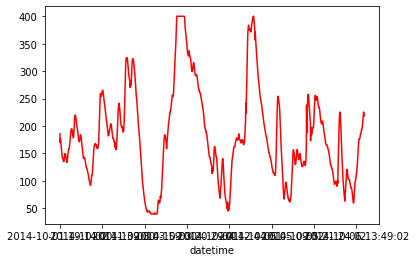

In [ ]:
p1['glucose'].plot(color='red', legend=None)


#### ARIMA

Series de tiempo no estacionaria. Explica el numero de diferencias no estacionales que debemos examinar para establecer estacionariedad. La parte integrada transforma los datos para que sean estacionarios.

Estrategia:
* Empezamos con el modelo más simple ARIMA(1,1,1)
* Examinamos los residuos
* Complejizamos
* Bajamos el número de componentes

Para cada integración perdemos una observación, por lo que hay que tener encuenta la cantidad de integraciones y de retornos que decidamos coger.

In [ ]:
p1_c = p1.copy()
del p1_c['datetime']
del p1_c['id']
del p1_c['date']
del p1_c['time']

p1_c.head()

,glucose
datetime,
2014-10-01 19:14:00,185.5854
2014-10-01 19:19:00,178.3782
2014-10-01 19:23:00,169.3692
2014-10-01 19:24:00,176.5764
2014-10-01 19:29:00,172.9728


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
size = int(len(p1_c)*0.8)
df_train, df_test = p1_c.iloc[:size], p1_c.iloc[size:]

In [ ]:
def LLR_test(mod_1, mod_2, DF=1):
  L1 = mod_1.llf
  L2 = mod_2.llf
  LR = (2*(L2-L1))
  p = chi2.sf(LR, DF).round(3)
  return p

**ARIMA(1,1,1)**

In [ ]:
model_1_1_1 = ARIMA(df_train.glucose, order=(1,1,1))
results_1_1_1 = model_1_1_1.fit()
results_1_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.glucose   No. Observations:                 1149
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2931.857
Method:                       css-mle   S.D. of innovations              3.103
Date:                Thu, 20 May 2021   AIC                           5871.713
Time:                        07:32:03   BIC                           5891.900
Sample:                             1   HQIC                          5879.334
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0849      0.602     -0.141      0.888      -1.266       1.096
ar.L1.D.glucose     0.9137      0.014     66.789      0.000       0.887       0.941
ma.L1.D.glucose    -0.4271      0.025    -17.285      0.000      -0.476      -0.379
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0945           +0.0000j            1.0945            0.0000
MA.1            2.3414           +0.0000j            2.3414            0.0000
-----------------------------------------------------------------------------
"""

Observamos que los p-valores de los dos coeficientes son 0. Por lo que son significativamente igual a cero, por lo que este modelo es una posible opción.

##### Residuals of the ARIMA(1,1,1)

Observamos su autocorrelación



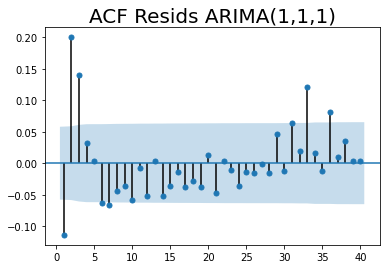

In [ ]:
df_train['res_1_1_1'] = results_1_1_1.resid
sgt.plot_acf(df_train.res_1_1_1[1:], zero=False, lags=40)
plt.title('ACF Resids ARIMA(1,1,1)', size=20)
plt.show() 


Vemos que los retrasos 1,2,3 son altamente significativos. Podríamos pensar que el retraso número 7 podría ser significativo

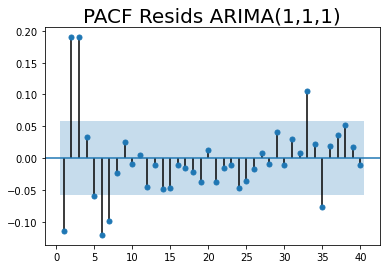

In [ ]:
sgt.plot_pacf(df_train.res_1_1_1[1:], zero=False, lags=40)
plt.title('PACF Resids ARIMA(1,1,1)', size=20)
plt.show(); 

Se observa mejor que igual un retraso de 7 podría ser una buena aproximación.

#### High-Lag ARIMA Models

In [ ]:
model_0_1_7 = ARIMA(df_train.glucose, order=(0,1,7))
results_0_1_7 = model_0_1_7.fit()
results_0_1_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.glucose   No. Observations:                 1149
Model:                 ARIMA(0, 1, 7)   Log Likelihood               -2877.704
Method:                       css-mle   S.D. of innovations              2.959
Date:                Thu, 20 May 2021   AIC                           5773.408
Time:                        07:32:05   BIC                           5818.828
Sample:                             1   HQIC                          5790.554
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0691      0.320     -0.216      0.829      -0.696       0.558
ma.L1.D.glucose     0.3297      0.030     11.032      0.000       0.271       0.388
ma.L2.D.glucose     0.5837      0.030     19.374      0.000       0.525       0.643
ma.L3.D.glucose     0.5745      0.032     18.019      0.000       0.512       0.637
ma.L4.D.glucose     0.4666      0.031     15.095      0.000       0.406       0.527
ma.L5.D.glucose     0.3679      0.031     11.683      0.000       0.306       0.430
ma.L6.D.glucose     0.2072      0.029      7.144      0.000       0.150       0.264
ma.L7.D.glucose     0.1418      0.029      4.894      0.000       0.085       0.199
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.7281           -0.8908j            1.1505           -0.1409
MA.2            0.7281           +0.8908j            1.1505            0.1409
MA.3           -1.3968           -0.0000j            1.3968           -0.5000
MA.4           -0.9036           -1.1227j            1.4411           -0.3579
MA.5           -0.9036           +1.1227j            1.4411            0.3579
MA.6            0.1434           -1.3475j            1.3551           -0.2331
MA.7            0.1434           +1.3475j            1.3551            0.2331
-----------------------------------------------------------------------------
"""

In [ ]:
model_1_1_2 = ARIMA(df_train.glucose, order=(1,1,2))
results_1_1_2 = model_1_1_2.fit()
model_2_1_1 = ARIMA(df_train.glucose, order=(2,1,1))
results_2_1_1 = model_2_1_1.fit()



In [ ]:
print("ARIMA(1,1,1): \t LL = ", results_1_1_1.llf, "\t AIC = ", results_1_1_1.aic)
print("ARIMA(1,1,2): \t LL = ", results_1_1_2.llf, "\t AIC = ", results_1_1_2.aic)
print("ARIMA(2,1,1): \t LL = ", results_2_1_1.llf, "\t AIC = ", results_2_1_1.aic)
print("ARIMA(0,1,7): \t LL = ", results_0_1_7.llf, "\t AIC = ", results_0_1_7.aic)

ARIMA(1,1,1): 	 LL =  -2931.856572212645 	 AIC =  5871.71314442529
ARIMA(1,1,2): 	 LL =  -2870.86898541481 	 AIC =  5751.73797082962
ARIMA(2,1,1): 	 LL =  -2898.1230615521163 	 AIC =  5806.2461231042325
ARIMA(0,1,7): 	 LL =  -2877.704212943405 	 AIC =  5773.40842588681


Parece que el mejor es ARIMA(1,1,2)

In [ ]:
print("\nLLR test p-valor = ", str(LLR_test(results_1_1_1, results_1_1_2)))


LLR test p-valor =  0.0


In [ ]:
print("\nLLR test p-valor = ", str(LLR_test(results_1_1_1, results_0_1_7, DF=5)))


LLR test p-valor =  0.0


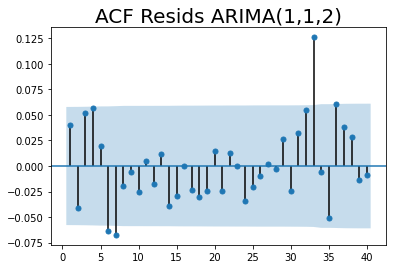

In [ ]:
df_train['res_1_1_2'] = results_1_1_2.resid
sgt.plot_acf(df_train.res_1_1_2[1:], zero=False, lags=40)
plt.title('ACF Resids ARIMA(1,1,2)', size=20)
plt.show() 

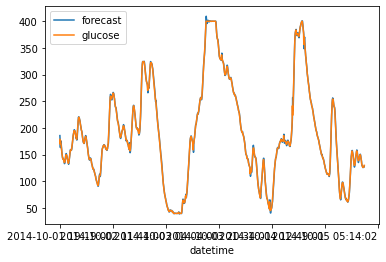

In [ ]:
results_0_1_7.plot_predict(dynamic=False)
plt.show();
#When you set dynamic=False the in-sample lagged values are used for prediction.